<h1>Principle Component Analysis Of Dataset (SDT Ratio NLLS Criterion)</h1>

In [87]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing libraries for statistical testing:
from scipy.stats import ttest_ind

<h2>Importing The Dataset + Preprocessing</h2>

In [88]:
# Absolute filepath for the .csv file to be loaded
absolute_filepath = r"C:\Users\Jason Ha\Documents\University\4th Year\Thesis Project (Repo)\Jupyter Notebooks\Active Projects\sdt.csv"

# Loading the .csv file as a dataframe into the workspace.
df = pd.read_csv(absolute_filepath)

# While all other parameters are worth investigating, we want to specifically see how well the following features fare
# in the classification of the spindles, namely the SDT ratio.
all_params = df.columns
important_params = ['a', 'b', 'c', 'd', 'e', 'f', 'sdt_ratio', 'label']
important_params_nolabel = ['a', 'b', 'c', 'd', 'e', 'f', 'sdt_ratio']

# Extracting these from 'df':
df_important = df[all_params]

# We want to see the QPS parameter distribution for the spindles and non-spindles separately and see if there are any
# notable differences. A T-test is performed right after for an proper analytical comparison:
df_important_spin = df_important[(df_important['label'] == 1)]
df_important_nonspin = df_important[(df_important['label'] == 0)]

<h3>Spindle Statistics</h3>

In [89]:
df_important_spin.describe().round(5)

,a,b,c,d,e,f,qps_energy,real_energy,residual_energy,qser,rser,energy_error_percent,real_freq_hz,qps_freq_hz,freq_error_percent,raw_qps_corrcoeff,sdt_ratio,label
count,13553.00000,13553.00000,13553.00000,1.355300e+04,13553.00000,13553.00000,13553.00000,1.355300e+04,13553.00000,13553.00000,13553.00000,13553.00000,13553.00000,13553.00000,13553.00000,13553.00000,13553.00000,13553.0
mean,0.21608,-0.59969,-10.36836,9.098149e+06,63.35213,0.59136,2444.16489,8.191255e+04,2804.46272,0.04061,0.05134,95.93913,13.13634,10.08280,27.30583,0.68036,0.39564,1.0
std,2.07810,9.22087,16.32213,1.997112e+07,36.40732,14.43478,5429.06058,1.865752e+05,7890.26124,0.05861,0.11906,5.86096,1.11513,5.79440,41.57962,0.37312,0.32819,0.0
min,-50.00000,-193.35529,-235.54470,-7.208346e+07,-129.64522,-162.04258,0.00000,3.085571e+03,2.44009,0.00000,0.00005,57.87157,10.24066,-20.63368,0.00058,-0.31901,0.01317,1.0
25%,-0.77053,-2.08837,-14.67354,-1.221340e+00,69.00981,-4.85262,107.33897,2.143341e+04,127.80682,0.00304,0.00369,94.95872,12.28879,10.98325,1.79853,0.56780,0.18883,1.0
50%,0.62475,-0.48465,-5.16592,6.582200e-01,79.88802,0.00000,544.46740,3.686974e+04,321.79025,0.01783,0.00813,98.21719,13.31285,12.71457,3.84174,0.87209,0.31578,1.0
75%,1.38200,0.79070,-0.79017,3.049570e+00,85.84746,6.29023,2062.53582,7.063926e+04,1078.49316,0.05041,0.02064,99.69606,14.33692,13.66305,24.01617,0.94104,0.49770,1.0
max,3.72912,221.85474,47.91678,7.372272e+07,138.05243,179.83804,85074.48614,4.505983e+06,124084.57180,0.42128,0.86846,100.00000,16.38505,21.97173,259.99849,0.99884,5.08243,1.0


<h3>Non-Spindle Statistics</h3>

In [90]:
df_important_nonspin.describe().round(5)

,a,b,c,d,e,f,qps_energy,real_energy,residual_energy,qser,rser,energy_error_percent,real_freq_hz,qps_freq_hz,freq_error_percent,raw_qps_corrcoeff,sdt_ratio,label
count,378865.00000,378865.00000,378865.00000,3.788650e+05,378865.00000,378865.00000,378865.00000,3.788650e+05,378865.00000,378865.00000,378865.00000,378865.00000,378865.00000,378865.00000,378865.00000,378862.00000,378865.00000,378865.0
mean,0.15940,-0.34907,-10.69885,7.210332e+06,64.88584,0.70311,1597.69025,7.718717e+04,1672.58757,0.03409,0.03604,96.59103,13.10568,10.32690,25.56922,0.69138,0.35372,0.0
std,1.98075,8.91093,16.28481,1.762991e+07,35.28149,14.59056,3832.91031,2.658737e+05,5496.46992,0.05140,0.09433,5.14021,1.12671,5.61522,40.28227,0.35990,0.27023,0.0
min,-50.00000,-265.25910,-311.26277,-9.163724e+07,-200.67997,-317.13797,0.00000,1.522239e+03,0.00000,0.00000,0.00000,36.57801,10.24066,-31.93921,0.00002,-0.45585,0.00000,0.0
25%,-0.74594,-1.95107,-15.25829,-1.264930e+00,71.70431,-5.09641,116.07505,1.919127e+04,103.70222,0.00348,0.00319,95.97823,12.28879,11.41210,1.76612,0.64819,0.17467,0.0
50%,0.57469,-0.42035,-5.46686,5.618700e-01,80.05215,0.00000,443.34793,3.264067e+04,242.14921,0.01561,0.00702,98.43943,13.31285,12.74070,3.74561,0.86762,0.29149,0.0
75%,1.25115,0.94008,-0.93873,2.708660e+00,85.85525,6.70761,1427.93568,6.217693e+04,699.70227,0.04022,0.01616,99.65202,14.33692,13.66429,19.70537,0.93563,0.45698,0.0
max,4.66841,231.19320,119.24937,7.791540e+07,231.49269,226.42005,502069.61730,1.922495e+07,565834.52400,0.63422,0.89268,100.00000,16.38505,36.84321,353.12468,0.99969,9.66071,0.0


<h2>T-Test For Proper Statistical Comparison Between Features</h2>

For a significance level of $\alpha = 1\%$, only parameter $c$ can be used. However, if we loosen the significance level to $alpha = 5\%$, $c$, $d$ and the $sdt\_ratio$ can be used. We can experiment with this when we come to the neural network model.

<h2>Principle Component Analysis Of Dataset</h2>

The above T-test shows that certain features have p-values well below the significance level of 1%. Of these selected features, there are two/three of them that will serve as the most important features that play the biggest role in the class separation. 

<h3>Background Theory</h3>

Suppose we have $n$ feature vectors which we denote by $\mathbf{x}_1, \mathbf{x}_2 ... \mathbf{x}_n$. These feature vectors may not necessarily have the same variance (as they might be values derived from different characteristics like voltage and frequency for instance). As such, we compute the grand mean of all the feature vectors first to produce the mean vector, $\mathbf{\mu}$ which can be computed as:

\begin{equation}
    \mathbf{\mu} = \frac{1}{n}\left(\mathbf{x}_1 + \mathbf{x}_2 + ... + \mathbf{x}_n\right)
\end{equation}

We then use the mean to re-centre all the feature vectors about the grand mean in order to analyse the relationship between all feature vectors. This produces new vectors, $\mathbf{y}_1, \mathbf{y}_2, \mathbf{y}_3...\mathbf{y}_n$. Concatenating all these vectors, we get the matrix, $B$:

\begin{equation}
    B = \left(\mathbf{y}_1 | \mathbf{y}_2 | \mathbf{y}_3 |...|\mathbf{y}_n \right)
\end{equation}

The covariance matrix, $S$ can then be developed from the matrix $B$ as:

\begin{equation}
    S = \frac{1}{n-1} BB^T
\end{equation}

The covariance matrix, $S$ can be decomposed into eigenvectors, $\mathbf{v}_i$ (for $i = 1,2,3 ... n$) which act as the <b>principle components</b> of the feature set each of which have a corresponding eigenvalue, $\lambda_i$ that serve as the weighting for each principle component. The larger the eigenvalue, the greater the importance of that eigenvector in the separation of the classes. The eigenvectors (principle components) are found by solving the following equation:

\begin{equation}
    S\mathbf{x} = \lambda\mathbf{x} \hspace{1cm} or \hspace{1cm} S\mathbf{x} - \lambda\mathbf{x} = \mathbf{0}
\end{equation}

And the eigenvalues are found by solving the characteristic polynomial based on the above equation:

\begin{equation}
    det(S - \lambda I) = 0
\end{equation}

The characteristic polynomial solution and the eigenvectors are of course found via computation. Sklearn has a function called ```PCA``` in the ```decomposition``` class that performs the decomposition for us. We perform this in the proceeding code cell.

In [91]:
# Import the PCA package:
from sklearn.decomposition import PCA

# Instantiate an instance of the PCA. Retain the two most important
# principal components in the feature set.
pca = PCA(n_components = 2)

# Split dataset into spindle and non-spindles:
# Randomise the non-spindle set and truncate so equal in length to the spindle set:
spindles = df_important[df_important['label'] == 1]
non_spindles = df_important[df_important['label'] == 0].sample(frac=1).reset_index(drop = True)

# Truncate non-spindles:
non_spindles = non_spindles.iloc[0:len(spindles), :]

# Concatenate the spindle and non-spindle dataset then jumble once again before splitting into train and test set:
final_df = pd.concat([spindles, non_spindles], axis=0).reset_index(drop=True)
final_df = final_df.sample(frac=1)

# Split into X and y (feature vectors and label vector):
X = final_df[list_params]

y = final_df['label']

# Standardise the feature vectors, X, using 'StandardScaler'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fit the standardised dataframe onto the PCA model:
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

principal_df.head()

,principal component 1,principal component 2
0,-1.302174,-0.796307
1,-0.579654,-0.640211
2,-2.390958,2.976688
3,-0.810294,-0.611705
4,-0.671267,-0.634435


In [92]:
# Concatenate the principal_df dataframe with the corresponding labels:
final_comps = pd.concat([principal_df, y], axis = 1)

# View the final dataframe:
final_comps.head()

,principal component 1,principal component 2,label
0,-1.302174,-0.796307,1
1,-0.579654,-0.640211,1
2,-2.390958,2.976688,1
3,-0.810294,-0.611705,1
4,-0.671267,-0.634435,1


In [93]:
final_df

,a,b,c,d,e,f,qps_energy,real_energy,residual_energy,qser,rser,energy_error_percent,real_freq_hz,qps_freq_hz,freq_error_percent,raw_qps_corrcoeff,sdt_ratio,label
12184,-0.000678,-17.108261,-36.220755,1.821686e+00,81.467116,5.148036,1511.292488,19316.412570,359.625155,0.078239,0.018618,92.176122,11.264721,12.965894,15.101779,0.898780,0.508213,1
22682,0.502934,-1.086968,-2.562470,-6.916967e-01,74.964599,8.298240,278.519798,17103.277950,188.752755,0.016285,0.011036,98.371541,12.288786,11.930986,2.911598,0.772035,0.251682,0
6423,2.214739,0.753857,-2.190028,6.493006e-02,86.658064,1.465049,8266.078836,31551.875870,761.968857,0.261984,0.024150,73.801625,13.312852,13.792059,3.599584,0.956929,0.520885,1
6683,1.406924,-0.048815,-31.912870,4.226894e-01,83.193259,-44.764490,473.553741,36440.397070,699.280846,0.012995,0.019190,98.700470,12.288786,13.240618,7.745533,0.635530,0.342640,1
16807,0.717333,-0.432109,-6.869945,2.657868e-01,75.256892,-9.070201,257.693324,30918.946570,123.157845,0.008334,0.003983,99.166552,12.288786,11.977506,2.533042,0.822583,0.444903,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,0.295741,0.541309,2.980631,1.295160e-01,89.500796,0.770105,419.363767,50996.547010,536.889146,0.008223,0.010528,99.177662,14.336918,14.244494,0.644654,0.662199,0.293776,1
2442,0.059943,-5.067895,-6.782173,-5.876750e-01,78.735866,-1.631859,333.084092,62766.111420,28.920195,0.005307,0.000461,99.469325,12.288786,12.531202,1.972658,0.959197,0.120507,1
23466,-0.743217,-11.894272,-13.599811,1.832444e-01,85.123285,8.774070,1154.108799,55486.423610,58.843018,0.020800,0.001060,97.920016,13.312852,13.547792,1.764758,0.975407,0.159620,0
3286,-0.629221,0.042758,-1.254927,5.865191e+07,-1.090182,0.000000,26.692723,131245.036000,4732.133357,0.000203,0.036056,99.979662,13.312852,-0.173508,101.303311,-0.017013,0.085723,1


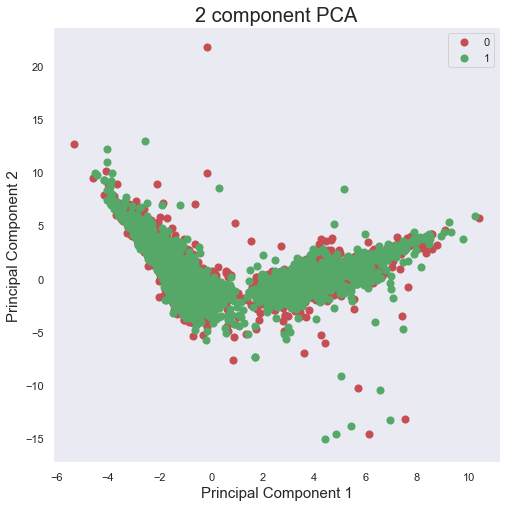

In [94]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_comps['label'] == target
    ax.scatter(final_comps.loc[indicesToKeep, 'principal component 1']
               , final_comps.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()